In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk


In [3]:
df=pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      16243 non-null  int64  
 1   ProductId               16243 non-null  object 
 2   UserId                  16242 non-null  object 
 3   ProfileName             16241 non-null  object 
 4   HelpfulnessNumerator    16242 non-null  float64
 5   HelpfulnessDenominator  16242 non-null  float64
 6   Score                   16242 non-null  float64
 7   Time                    16242 non-null  float64
 8   Summary                 16242 non-null  object 
 9   Text                    16242 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [5]:
df.shape

(16243, 10)

In [6]:
df=df.head(1000)

In [7]:
df.drop(columns=['Id','ProductId','ProfileName'],inplace=True)

In [8]:
df.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,A3SGXH7AUHU8GW,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


##Performing some EDA


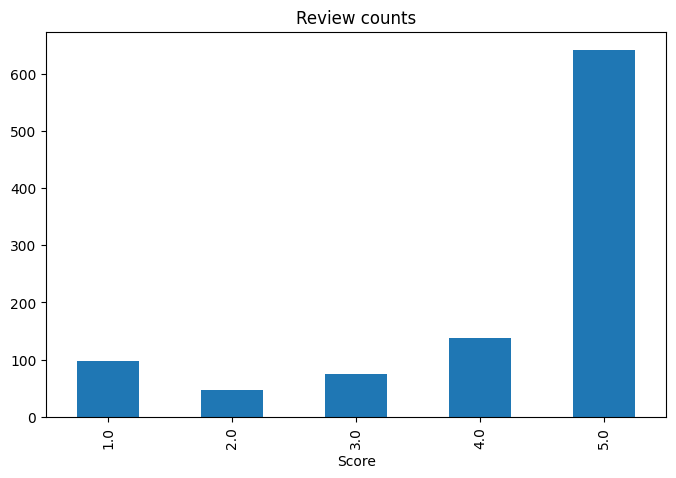

In [9]:
df['Score'].value_counts().sort_index().plot(kind='bar',title='Review counts',figsize=(8,5));

In [11]:
!pip install textacy==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.4/208.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.5 MB/s eta 0:00:00


In [10]:
import string
import re

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
text="[Shreyansh] was https://best.com and no one can replace him. 4 sure"
print(clean_text(text))

 was  and no one can replace him  sure


In [12]:
!pip install transformers==4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.31.0 which is incompatible.


In [13]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.31.0
    Uninstalling transformers-4.31.0:
      Successfully uninstalled transformers-4.31.0


In [14]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [15]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

example=df['Text'][50]
sia.polarity_scores(example)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
example=df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [19]:
# Run for the Roberta Model
encoded_text=tokenizer(example,return_tensors='pt') ## pt stands for pytorch
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores

array([0.97635514, 0.02068746, 0.00295737], dtype=float32)

In [20]:
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573706}


In [21]:
# scores = output[0][0].detach().numpy()

# Purpose: This line extracts the actual prediction scores from the model's output.
# The output[0] gives the logits (raw model outputs) corresponding to each sentiment class (negative, neutral, and positive).
# [0] is used again to pick the first instance (as the input is typically a batch, but in this case, it's just a single text, so we access the first element).
# .detach() removes the tensor from the computation graph (necessary if you're using PyTorch for backpropagation, but not needed for inference).
# .numpy() converts the tensor into a NumPy array for easier manipulation.
def polarity_scores_robert(example):
    encoded_text=tokenizer(example,return_tensors='pt') ## pt stands for pytorch
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
    }
    return scores_dict


In [22]:
from tqdm.notebook import tqdm
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text=row['Text']
        myid=row['UserId']
        scores=polarity_scores_robert(text)
        res[myid]=scores;
    except RuntimeError:
      print(f'Broke for {i}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for 82
Broke for 186
Broke for 528
Broke for 539
Broke for 745
Broke for 862


In [32]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'UserId'})

In [34]:
results_df=results_df.merge(df,how='left')

In [35]:
results_df.head()

,UserId,roberta_neg,roberta_neu,roberta_pos,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,A3SGXH7AUHU8GW,0.009624,0.049980,0.940395,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,0.508986,0.452413,0.038600,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,0.003229,0.098067,0.898704,1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,0.002295,0.090219,0.907486,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,0.001635,0.010302,0.988063,0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


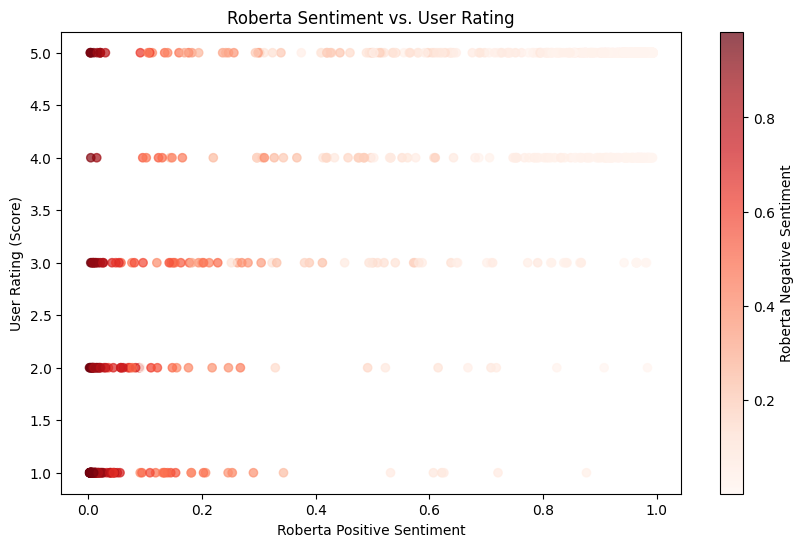

In [36]:
# @title Roberta Sentiment vs. User Rating

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(results_df['roberta_pos'], results_df['Score'], c=results_df['roberta_neg'], cmap='Reds', alpha=0.7)
plt.xlabel('Roberta Positive Sentiment')
plt.ylabel('User Rating (Score)')
plt.title('Roberta Sentiment vs. User Rating')
_ = plt.colorbar(label='Roberta Negative Sentiment')